# Veri Yükleme

In [1]:
import tensorflow as tf
import torch 
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

base_dir=r"C:\Users\mkadi\Desktop\Bitirme\X-ray\X-ray"
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.9)
test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.01)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 1517 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [2]:
train_datagen

# 5 Tane Rastgele Görsel

(2, 500, 500, 3)
[0. 1. 0.]


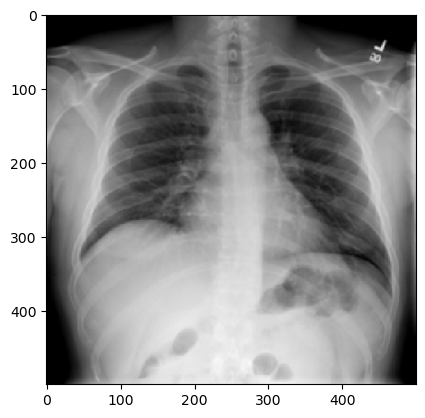

(2, 500, 500, 3)
[1. 0. 0.]


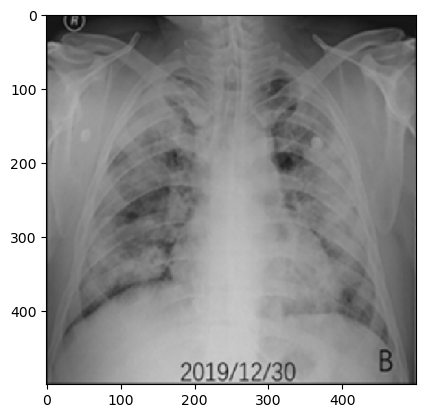

(2, 500, 500, 3)
[1. 0. 0.]


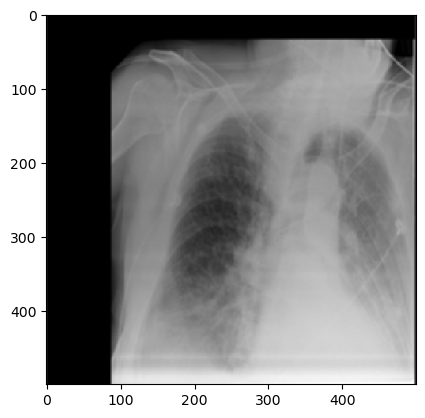

(2, 500, 500, 3)
[0. 1. 0.]


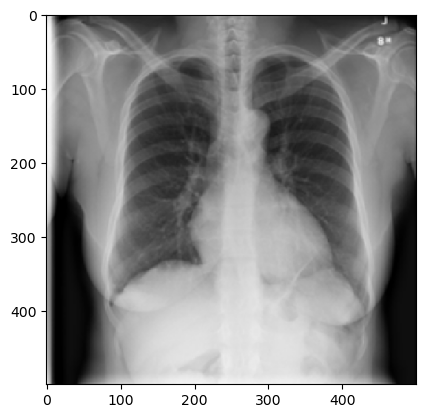

(2, 500, 500, 3)
[0. 1. 0.]


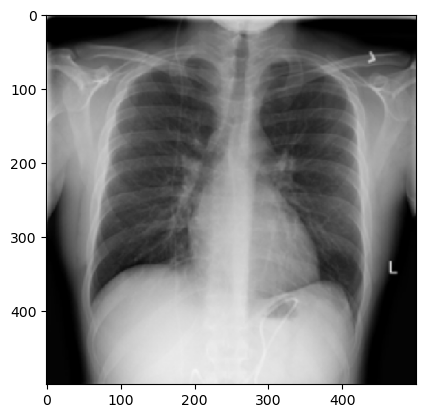

In [3]:
import matplotlib.pyplot as plt
for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

# Kütüphaneler

In [4]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations



# Model Oluşumu

In [5]:
model = Sequential()

model.add(layers.Conv2D(filters=8,activation="relu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())


model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 244, 16)      3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 32)       0

# Model Eğitimi

In [7]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()



In [8]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
result=model.fit(train_datagen,epochs=2,verbose=1,validation_data=test_datagen)

Epoch 1/2
759/759 [==============================] - 19s 18ms/step - loss: 0.6564 - mse: 0.1202 - accuracy: 0.7278 - val_loss: 0.5547 - val_mse: 0.1093 - val_accuracy: 0.7733
Epoch 2/2
759/759 [==============================] - 12s 16ms/step - loss: 0.4751 - mse: 0.0914 - accuracy: 0.8069 - val_loss: 0.4791 - val_mse: 0.0997 - val_accuracy: 0.7867


# Model Testi

In [11]:
#model.evaluate(test_datagen)

{'Covid': 0, 'Normal': 1, 'Viral': 2}
1/1 [==============================] - 0s 95ms/step
normal


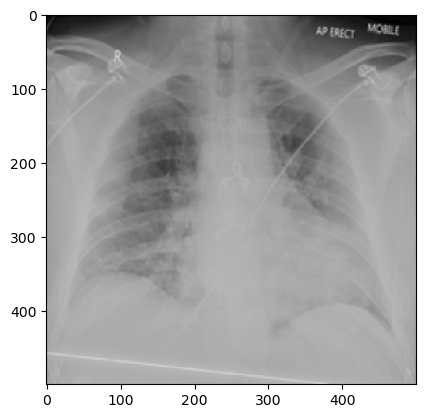

1/1 [==============================] - 0s 28ms/step
normal


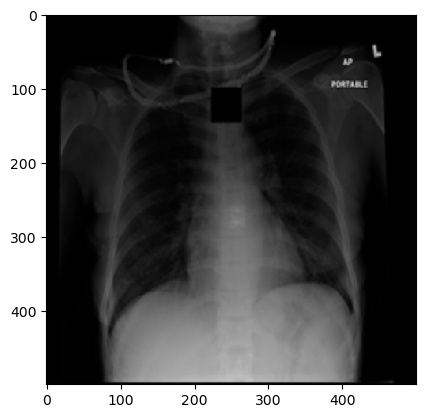

1/1 [==============================] - 0s 19ms/step
normal


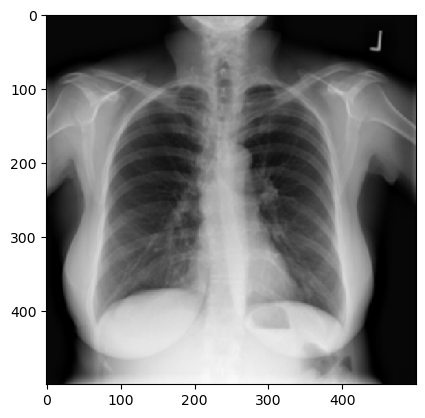

1/1 [==============================] - 0s 22ms/step
normal


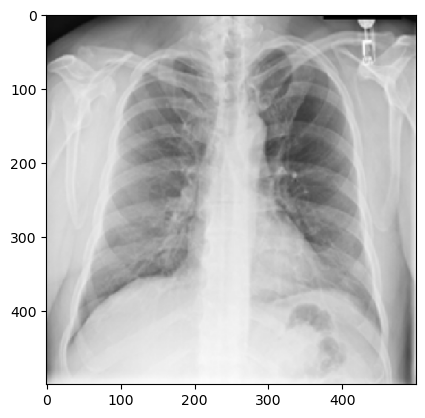

1/1 [==============================] - 0s 25ms/step
normal


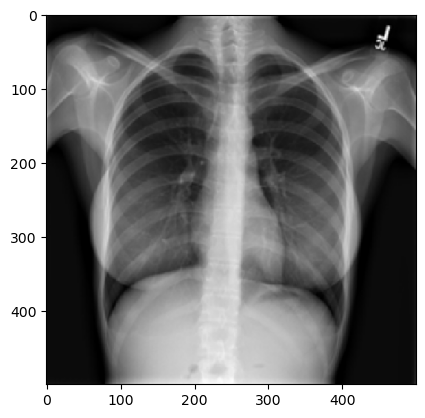

1/1 [==============================] - 0s 23ms/step
Viral


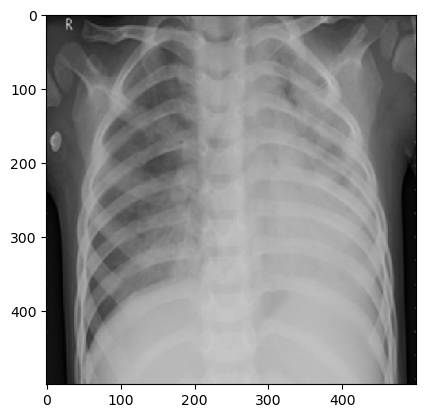

1/1 [==============================] - 0s 16ms/step
normal


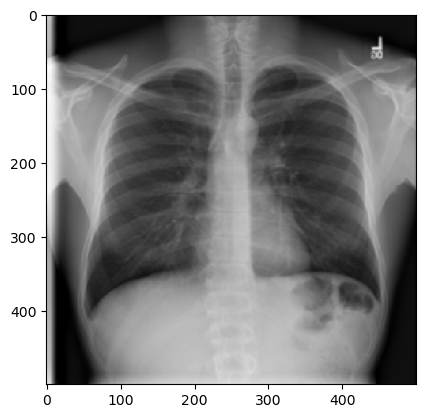

1/1 [==============================] - 0s 22ms/step
normal


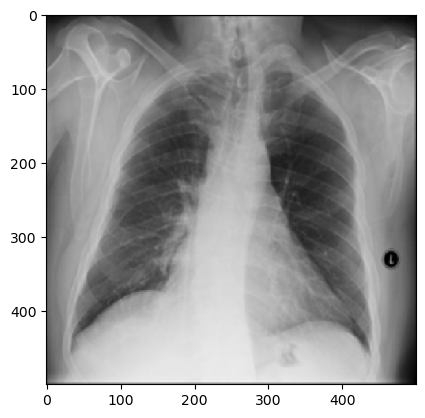

1/1 [==============================] - 0s 18ms/step
Viral


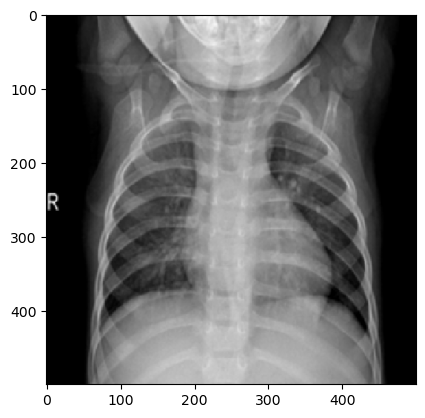

1/1 [==============================] - 0s 17ms/step
normal


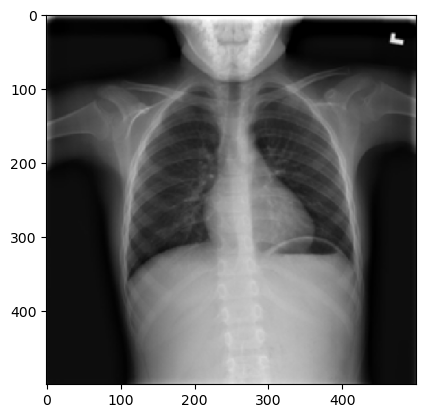

In [12]:
print(test_datagen.class_indices)
for _ in range(10):
    img,label=test_datagen.next()
    a=model.predict(img)
    np.argmax(a[0])
    plt.imshow(img[0])
    if np.argmax(a[0])==0:
        print("Covid")
    if np.argmax(a[0])==1:
        print("normal")
    if np.argmax(a[0])==2:
        print("Viral")
        
    plt.show()

In [13]:
from PIL import Image
from skimage import transform

In [14]:
image=Image.open(r"C:\Users\mkadi\Desktop\Bitirme\test\COVID19\COVID19(475).jpg")

def tek_resim(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image,(500,500,3))
    image=np.expand_dims(image,axis=0)
    print(test_datagen.class_indices)
    return image

image=tek_resim(r"C:\Users\mkadi\Desktop\Bitirme\test\COVID19\COVID19(475).jpg")
pred=model.predict(image)
print(pred)
np.argmax(pred)
    

{'Covid': 0, 'Normal': 1, 'Viral': 2}
1/1 [==============================] - 0s 15ms/step
[[0.29538918 0.6542711  0.05033963]]


1

In [15]:
#test_a=model.predict(test_datagen)

In [16]:
#base_dirr=r"C:\Users\mkadi\Desktop\Bitirme\X-ray\dataset\train"
#old_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.9)


#old_datagen=old_datagen.flow_from_directory(base_dirr,target_size=(500,500),subset="validation",batch_size=64)

In [17]:
#model.evaluate(old_datagen)

In [18]:
#test_b=model.predict(old_datagen)

In [19]:
#test_b[1]

In [20]:
#np.argmax(test_b[1])

# Grafik Görselleri Oluşturma

In [21]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]


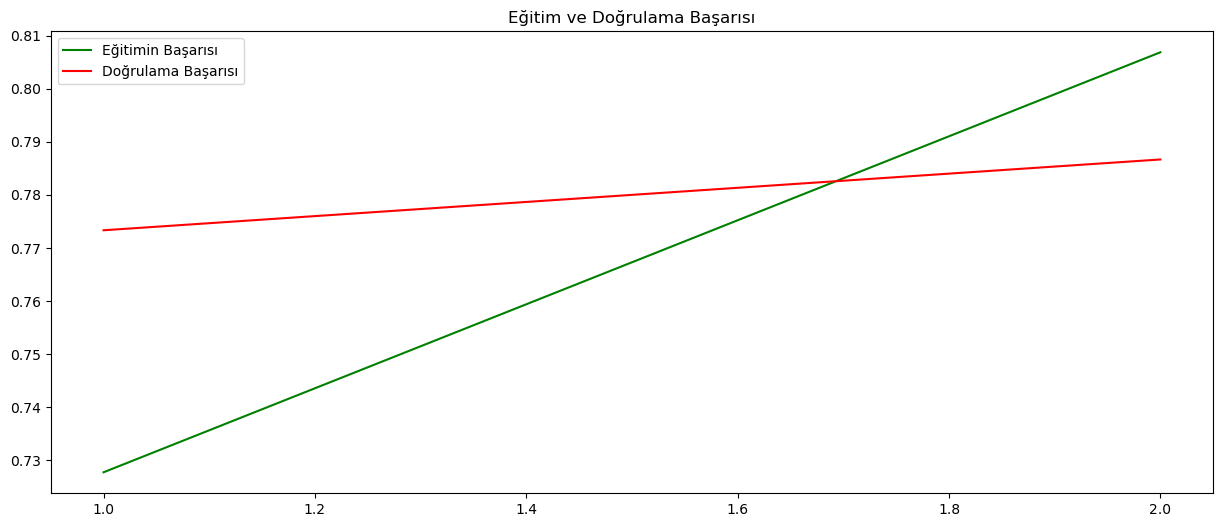

In [22]:
epoch=range(1,len(acc)+1)
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("Eğitimin Başarısı"),color="g")
plt.plot(epoch,val_acc,label=("Doğrulama Başarısı"),color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()


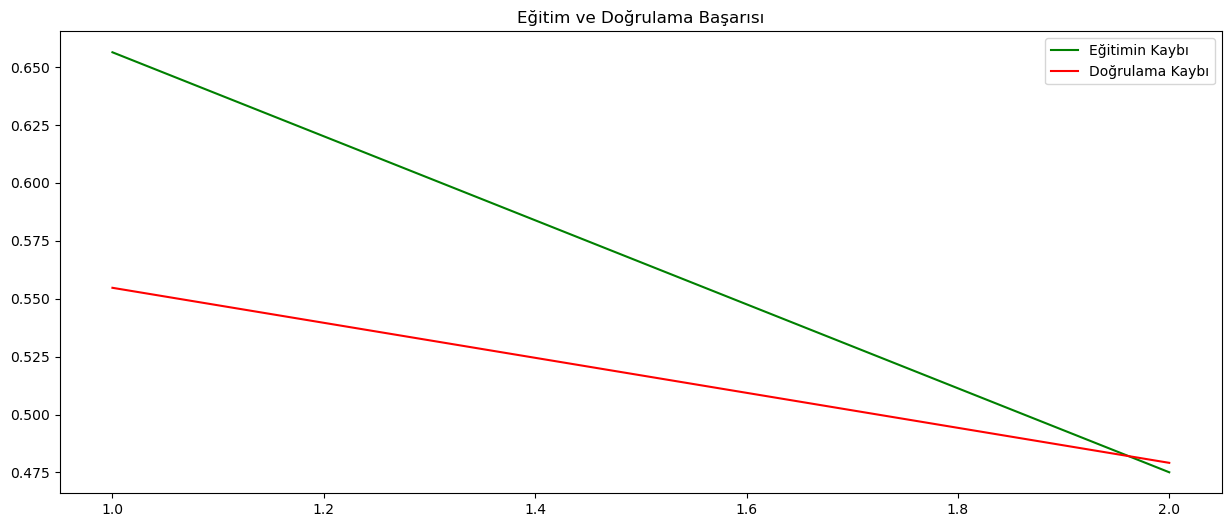

In [23]:
epoch=range(1,len(acc)+1)
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("Eğitimin Kaybı"),color="g")
plt.plot(epoch,val_loss,label=("Doğrulama Kaybı"),color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

In [24]:
#model.save("doksan-oran")

In [25]:
#model.save("flask-herokuV3.h5")

In [26]:
#import gradio as gr
#import requests

In [27]:
#class_names={"Covid","Normal","Viral"}

In [28]:
#def web_test(img):
  #  img1=img.reshape((-1, 500, 500, 3))
  #  tahmin=model.predict(img1).flatten()
  #  return {class_names[i]: float(tahmin[i]) for i in range(3)}

In [29]:
#image=gr.inputs.Image(shape=(500,500))
#label=gr.outputs.Label(num_top_classes=3)

#gr.Interface(fn=web_test, inputs=image, outputs=label, capture_session=True).launch(debug='True')